In [2]:
import pandas as pd
#df = pd.read_pickle("dbDfConversion_checkpoint.pkl")

In [3]:
len(df["description"].dropna())

9323

In [4]:
df2 = pd.read_pickle("BCB_updated.pkl")

In [6]:
df2

,name,content,description
0,10000061.java,"private void insertHelper(ForceItem p, Qua...",Inserts a force item into a quadtree node.
1,10000064.java,"private void forceHelper(ForceItem item, Q...",Calculates gravitational forces between items ...
2,10000767.java,private void initialize() throws Sched...,Initializes a job file from classpath or local...
3,10000832.java,public static void main(String[] args) {\n...,Processes command-line arguments and initializ...
4,10001179.java,public RestServiceResult createPublication...,Manages publication material associations.
...,...,...,...
73314,999919.java,public static KeyStore getClientKeyStore(S...,Generates or retrieves a client keystore for a...
73315,9999618.java,@Override\n public String toString() {\...,Overrides toString method to provide detailed ...
73316,9999814.java,@Test\n public void testParseRegisterSe...,Tests parsing Register Sensor Response.
73317,9999815.java,@Test\n public void testParseInsertMeas...,Tests parsing and receiving an InsertObservati...


In [ ]:
#pickle dataset
import pandas as pd
import os

# Ścieżka do folderu z plikami
folder_path = './dataset/id2sourcecode'

# nazwa datasetu
DATASET_NAME = 'BCB'

# Lista do przechowywania danych
data = []

# Iteracja po plikach w folderze
for filename in os.listdir(folder_path):
    if filename.endswith('.java'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        data.append({
            'name': filename,
            'content': content,
            'description': ''
        })

# Tworzenie DataFrame
df = pd.DataFrame(data)

# Zapis do pliku pickle
df.to_pickle(f"{DATASET_NAME}.pkl")

In [ ]:
df

,name,content,description
0,10000061.java,"private void insertHelper(ForceItem p, Qua...",
1,10000064.java,"private void forceHelper(ForceItem item, Q...",
2,10000767.java,private void initialize() throws Sched...,
3,10000832.java,public static void main(String[] args) {\n...,
4,10001179.java,public RestServiceResult createPublication...,
...,...,...,...
73314,999919.java,public static KeyStore getClientKeyStore(S...,
73315,9999618.java,@Override\n public String toString() {\...,
73316,9999814.java,@Test\n public void testParseRegisterSe...,
73317,9999815.java,@Test\n public void testParseInsertMeas...,


In [ ]:
max(df["content"].apply(len))

137727

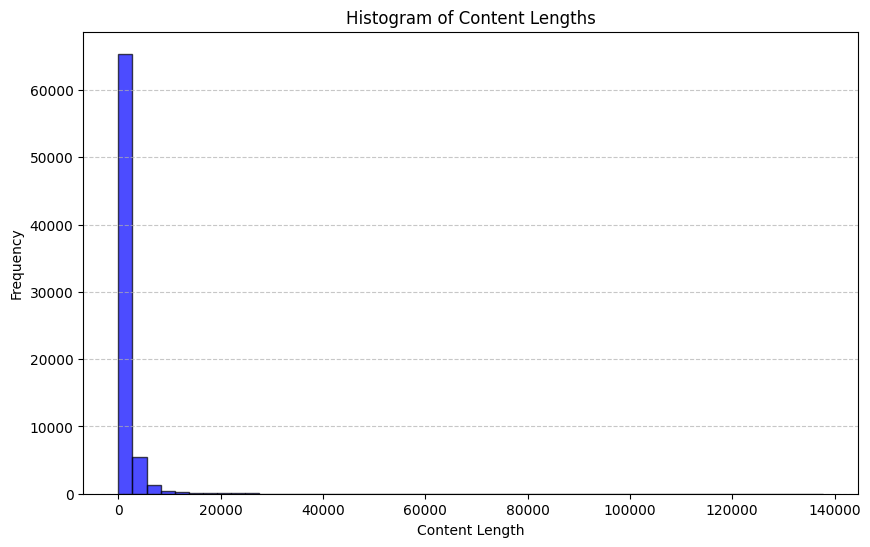

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the lengths of the 'content' column
content_lengths = df["content"].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(content_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Content Lengths")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1]:
# Importy
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Usunięcie brakujących wartości w kolumnie 'description'
descriptions = df2["description"].dropna()

# Tworzenie osadzeń zdań za pomocą SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(descriptions.tolist())

# Grupowanie za pomocą KMeans
num_clusters = 110  # Możesz dostosować liczbę klastrów
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#dbscan = DBSCAN(eps=0.5, min_samples=num_clusters)
df2['cluster'] = kmeans.fit_predict(embeddings)
#df2['cluster'] = dbscan.fit_predict(embeddings)
# Wyświetlenie wyników
print(df2[['description', 'cluster']].head())

c:\Users\timus\kod\sematnic_code_clones\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'df2' is not defined

In [ ]:
df2.to_pickle("BCB_updated_clustered_KMeans_110.pkl")

<Axes: xlabel='cluster'>

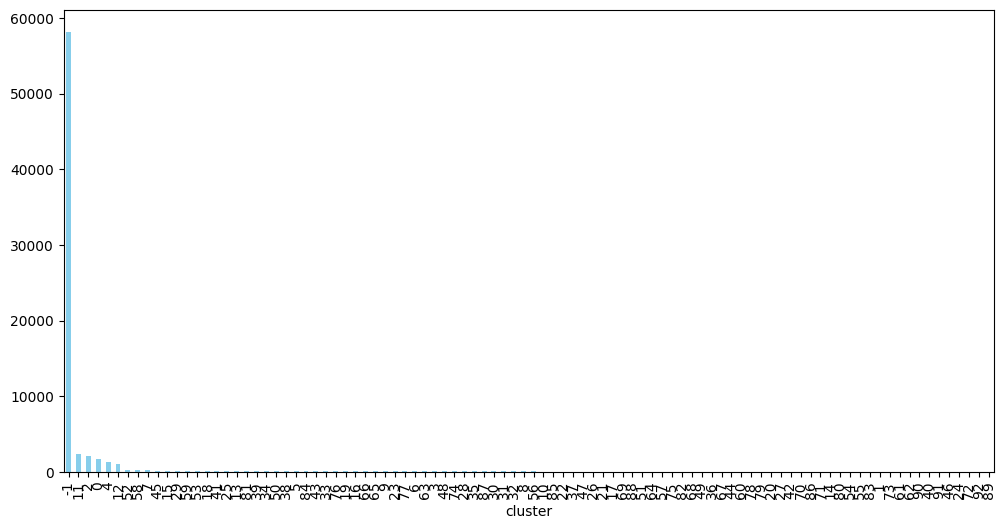

In [7]:
df2['cluster'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [10]:
BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',')

In [11]:
BCB_nonclones_df

,FUNCTION_ID_ONE,FUNCTION_ID_TWO
0,772874,23677215
1,2061557,23677215
2,2141807,23677215
3,993834,23677215
4,1150035,23677214
...,...,...
279027,2906686,23677214
279028,1181597,23677214
279029,606245,23677214
279030,2636728,23677215


In [9]:
# Wczytanie danych
BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',')
df2 = pd.read_pickle("BCB_updated_clustered_KMeans_100.pkl")
df2['id'] = df2['name'].str.replace('.java', '', regex=False)

# Tworzenie mapy z FUNCTION_ID na cluster_id
BCB_nonclones_df['FUNCTION_ID_ONE'] = BCB_nonclones_df['FUNCTION_ID_ONE'].astype(str)
BCB_nonclones_df['FUNCTION_ID_TWO'] = BCB_nonclones_df['FUNCTION_ID_TWO'].astype(str)

name_to_cluster = dict(zip(df2['id'].astype(str), df2['cluster']))

name_to_description = dict(zip(df2['id'].astype(str), df2['description']))

BCB_nonclones_df['description_one'] = BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_description)
BCB_nonclones_df['description_two'] = BCB_nonclones_df['FUNCTION_ID_TWO'].map(name_to_description)
# Dodanie kolumn cluster_id_one i cluster_id_two
BCB_nonclones_df['cluster_id_one'] = BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_cluster)
BCB_nonclones_df['cluster_id_two'] = BCB_nonclones_df['FUNCTION_ID_TWO'].map(name_to_cluster)

# Wyświetlenie wyników
print(BCB_nonclones_df.head())

# Zapis do pliku (opcjonalnie)
#BCB_nonclones_df.to_csv("BCB_nonclones_with_clusters.csv", index=False, encoding='utf-8')

  FUNCTION_ID_ONE FUNCTION_ID_TWO  \
0          772874        23677215   
1         2061557        23677215   
2         2141807        23677215   
3          993834        23677215   
4         1150035        23677214   

                                     description_one  \
0  Handles various actions in the application, in...   
1  Recursive file refactoring with metadata proce...   
2         Reads and lists files/dirs in a directory.   
3      Chinese text segmentation and model training.   
4    Imports documents and keyphrases into a corpus.   

                                     description_two  cluster_id_one  \
0                   Deletes a directory recursively.              43   
1                   Deletes a directory recursively.              36   
2                   Deletes a directory recursively.              22   
3                   Deletes a directory recursively.              78   
4  Deletes a directory and its contents recursively.              36   

   clus

In [10]:
#label - nieklon
#nowy label - klon

false_negatives = BCB_nonclones_df.where(BCB_nonclones_df["cluster_id_one"] == BCB_nonclones_df["cluster_id_two"]).dropna()
print(len(false_negatives))
false_negatives.sample(10)
#false_negatives.to_csv("BCB_KMeans100_false_negatives.csv", index=False, encoding='utf-8')

9215


,FUNCTION_ID_ONE,FUNCTION_ID_TWO,description_one,description_two,cluster_id_one,cluster_id_two
277079,7440177,23677168,Generates and stores UTMAS strong parameters a...,Generates RSA keys and writes them to files.,88.0,88.0
274301,18757595,23677147,Updates teacher details in database.,Updates a table based on conditions and rolls ...,57.0,57.0
276741,120779,23677226,Tests palindrome checking function with variou...,Checks if a string is a palindrome by reversin...,51.0,51.0
270284,3403013,23677158,Binary search for tree data based on ID.,Recursive binary search for primitive type.,25.0,25.0
32164,21974276,23677111,Downloads URL content and stores it in a byte ...,Downloads webpage content from a URL.,19.0,19.0
237250,1316867,23677118,Copies data between file channels with optiona...,Copies a file from source to destination.,93.0,93.0
214890,20282553,23677118,Copies a file to an S3 object.,Copies a file from source to destination.,93.0,93.0
195157,3248062,23677119,Copies a file from one location to another.,Copies contents of one file to another.,93.0,93.0
179015,18018418,23677119,Copies an object from source to target URI wit...,Copies contents of one file to another.,93.0,93.0
164,22335702,23677173,Captures the current screen as a BufferedImage.,Captures entire screen and saves as PNG.,29.0,29.0


In [17]:
BCB_nonclones_df.sample(20)

,FUNCTION_ID_ONE,FUNCTION_ID_TWO,cluster_id_one,cluster_id_two
85844,3894041,23677114,NaN,NaN
48340,22152417,23677115,NaN,NaN
147229,22846058,23677116,NaN,NaN
108117,20842546,23677114,NaN,NaN
222755,12886112,23677118,NaN,NaN
181996,18032609,23677119,NaN,NaN
2937,3298868,23677113,NaN,NaN
219763,1226604,23677118,NaN,NaN
192808,18438470,23677119,NaN,NaN
214456,6525553,23677118,NaN,NaN


In [26]:
df2.where(df2["id"] == "3894041").dropna()

,name,content,description,cluster,id
51466,3894041.java,protected void getMessageDirection(Message...,Extracts and validates message direction.,18.0,3894041


In [22]:
BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_cluster).dropna().unique()

array([], dtype=float64)

In [12]:
# Wczytanie danych
column_names = ["FUNCTION_ID_ONE", "FUNCTION_ID_TWO", "CLONE_TYPE", "SIMILARITY1", "SIMILARITY2"]  # Replace with actual column names

BCB_clones_df = pd.read_csv("BCB_clone.csv", encoding='utf-8', sep=',', names=column_names, header=None)
df2 = pd.read_pickle("BCB_updated_clustered_KMeans_100.pkl")
df2['id'] = df2['name'].str.replace('.java', '', regex=False)

# Tworzenie mapy z FUNCTION_ID na cluster_id
BCB_clones_df['FUNCTION_ID_ONE'] = BCB_clones_df['FUNCTION_ID_ONE'].astype(str)
BCB_clones_df['FUNCTION_ID_TWO'] = BCB_clones_df['FUNCTION_ID_TWO'].astype(str)

name_to_cluster = dict(zip(df2['id'].astype(str), df2['cluster']))

name_to_description = dict(zip(df2['id'].astype(str), df2['description']))

BCB_clones_df['description_one'] = BCB_clones_df['FUNCTION_ID_ONE'].map(name_to_description)
BCB_clones_df['description_two'] = BCB_clones_df['FUNCTION_ID_TWO'].map(name_to_description)
# Dodanie kolumn cluster_id_one i cluster_id_two
BCB_clones_df['cluster_id_one'] = BCB_clones_df['FUNCTION_ID_ONE'].map(name_to_cluster)
BCB_clones_df['cluster_id_two'] = BCB_clones_df['FUNCTION_ID_TWO'].map(name_to_cluster)

# Wyświetlenie wyników
print(BCB_clones_df.head())

  FUNCTION_ID_ONE FUNCTION_ID_TWO  CLONE_TYPE  SIMILARITY1  SIMILARITY2  \
0        20601756        23594635           3     0.578947     0.802920   
1         8001867        23594635           3     0.578947     0.737226   
2        15537156        23594635           3     0.500000     0.649635   
3        20619879        23594635           3     0.500000     0.723404   
4        16499420        23594635           3     0.555556     0.613139   

                                     description_one  \
0                   Copies a file to a new location.   
1              Builds a file by concatenating parts.   
2        Copies a file from one location to another.   
3  Copies a class file from binPath to agentFileL...   
4                   Saves an input stream to a file.   

                                     description_two  cluster_id_one  \
0  Copies a photo to the server's photo directory...              93   
1  Copies a photo to the server's photo directory...              36

In [13]:
# label - klon
# nowy label - nieklon
false_positives = BCB_clones_df.where(BCB_clones_df["cluster_id_one"] != BCB_clones_df["cluster_id_two"]).dropna()
print(len(false_positives))
false_positives.sample(10)

133069


,FUNCTION_ID_ONE,FUNCTION_ID_TWO,CLONE_TYPE,SIMILARITY1,SIMILARITY2,description_one,description_two,cluster_id_one,cluster_id_two
182380,17197906,22674365,3.0,0.010638,0.076271,Downloads a file from multiple URLs and writes...,Reads a resource file into bytes.,19.0,66.0
211204,7976872,21195765,3.0,0.092593,0.133949,"Copies a file from one location to another, ha...",Reads from input file and writes to output file.,93.0,96.0
66232,11418746,22098632,3.0,0.636364,0.805556,Builds SHA-1 hash of a string.,Converts a base64 image to an MD5 hash.,49.0,80.0
189953,11893997,13450574,3.0,0.200000,0.364407,Converts password to MD5 hash.,Generates a secure GUID using MD5 hashing.,80.0,32.0
231367,17871427,19366418,3.0,0.086957,0.317010,Decrypts a file using DES encryption.,Creates a photo and generates a thumbnail.,30.0,31.0
83478,3024982,14047630,3.0,0.545455,0.620690,Tests copying from an input stream to a writer...,Copies input to standard in and prints complet...,41.0,78.0
92542,490765,844414,3.0,0.818182,0.867925,Executes rsync installation and displays outpu...,Binds DNS server using apt-get.,20.0,23.0
200298,8344457,10937085,3.0,0.162162,0.275862,Adds files to a ZIP archive based on file name...,Decodes a file from ISO-8859-1 to UTF-8.,3.0,36.0
14446,8561747,19267604,3.0,0.500000,0.647668,"Copies a file from source to destination, prom...",Converts between document formats using tempor...,93.0,36.0
201493,15211815,23496079,3.0,0.190476,0.590278,Checks for package info in a URL.,Copies a template resource to an output stream.,52.0,5.0


c:\Users\timus\kod\sematnic_code_clones\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\timus\AppData\Local\Temp\ipykernel_30064\1679859218.py:27: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',', names=["FUNCTION_ID_ONE", "FUNCTION_ID_TWO"], header=None)
C:\Users\timus\AppData\Local\Temp\ipykernel_30064\1679859218.py:27: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',', names=["FUNCTION_ID_ONE", "FUNCTION_ID_TWO"], header=None)
C:\Users\timus\AppData\Local\Temp\ipykernel_30064\1679859218.py:27: DtypeWarning: Columns (0,1) have mixed types.

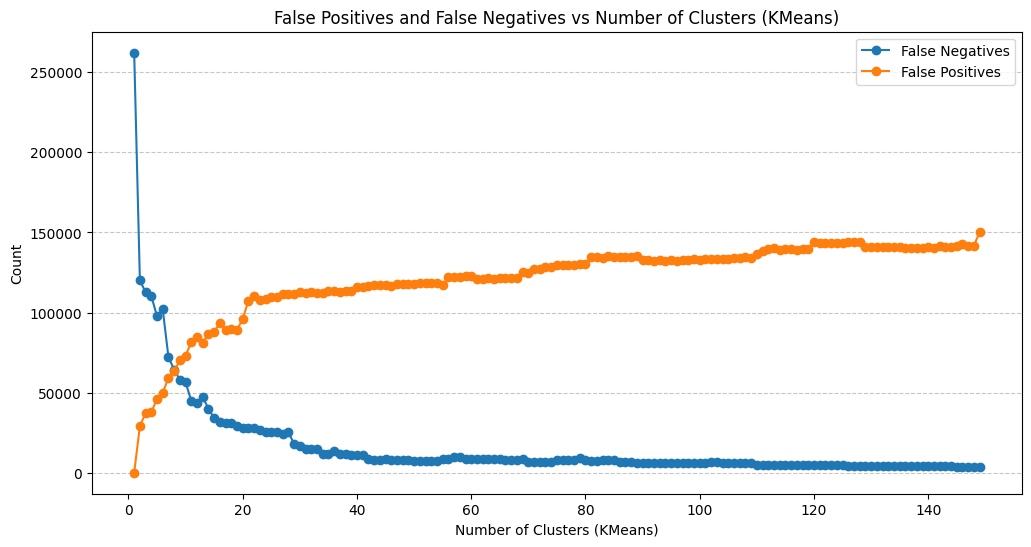

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Initialize variables
false_negatives_lengths = []
false_positives_lengths = []
num_clusters_list = range(1, 150, 1)  # Example: Clusters from 5 to 50 in steps of 5

# Load data
df2 = pd.read_pickle("BCB_updated.pkl")
df2['id'] = df2['name'].str.replace('.java', '', regex=False)
descriptions = df2["description"].dropna()
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(descriptions.tolist())

# Iterate over different numbers of clusters
for num_clusters in num_clusters_list:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df2['cluster'] = kmeans.fit_predict(embeddings)

    # Map clusters to FUNCTION_IDs
    name_to_cluster = dict(zip(df2['name'].str.replace('.java', '', regex=False), df2['cluster']))
    BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',', names=["FUNCTION_ID_ONE", "FUNCTION_ID_TWO"], header=None)
    BCB_nonclones_df['cluster_id_one'] = BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_cluster)
    BCB_nonclones_df['cluster_id_two'] = BCB_nonclones_df['FUNCTION_ID_TWO'].map(name_to_cluster)

    # Calculate false negatives
    false_negatives = BCB_nonclones_df.where(BCB_nonclones_df["cluster_id_one"] == BCB_nonclones_df["cluster_id_two"]).dropna()
    false_negatives_lengths.append(len(false_negatives))

    # Wczytanie danych
    column_names = ["FUNCTION_ID_ONE", "FUNCTION_ID_TWO", "CLONE_TYPE", "SIMILARITY1", "SIMILARITY2"]  # Replace with actual column names

    BCB_clones_df = pd.read_csv("BCB_clone.csv", encoding='utf-8', sep=',', names=column_names, header=None)
    # Tworzenie mapy z FUNCTION_ID na cluster_id
    BCB_clones_df['FUNCTION_ID_ONE'] = BCB_clones_df['FUNCTION_ID_ONE'].astype(str)
    BCB_clones_df['FUNCTION_ID_TWO'] = BCB_clones_df['FUNCTION_ID_TWO'].astype(str)

    name_to_cluster = dict(zip(df2['id'].astype(str), df2['cluster']))

    name_to_description = dict(zip(df2['id'].astype(str), df2['description']))

    BCB_clones_df['description_one'] = BCB_clones_df['FUNCTION_ID_ONE'].map(name_to_description)
    BCB_clones_df['description_two'] = BCB_clones_df['FUNCTION_ID_TWO'].map(name_to_description)
    # Dodanie kolumn cluster_id_one i cluster_id_two
    BCB_clones_df['cluster_id_one'] = BCB_clones_df['FUNCTION_ID_ONE'].map(name_to_cluster)
    BCB_clones_df['cluster_id_two'] = BCB_clones_df['FUNCTION_ID_TWO'].map(name_to_cluster)

    false_positives = BCB_clones_df.where(BCB_clones_df["cluster_id_one"] != BCB_clones_df["cluster_id_two"]).dropna()
    false_positives_lengths.append(len(false_positives))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(num_clusters_list, false_negatives_lengths, label="False Negatives", marker='o')
plt.plot(num_clusters_list, false_positives_lengths, label="False Positives", marker='o')
plt.title("False Positives and False Negatives vs Number of Clusters (KMeans)")
plt.xlabel("Number of Clusters (KMeans)")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
len(BCB_clones_df)
len(BCB_nonclones_df)

NameError: name 'BCB_clones_df' is not defined

In [10]:
#merge false positives and false negatives
false_positives['label'] = 'false_positive'
false_negatives['label'] = 'false_negative'
merged_df = pd.concat([false_positives, false_negatives], ignore_index=True)
#mix the rows
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Save the merged DataFrame to a CSV file
merged_df.to_csv("BCB_100means.csv", index=False, encoding='utf-8')

In [3]:
mat_non_clones = pd.read_pickle("non_clone_pair_emb_extended.pkl")
mat_clones = pd.read_pickle("clone_pair_emb_extended.pkl")

In [5]:
mat_non_clones = mat_non_clones.where(mat_non_clones["cosine_emb"]>= 0.6).dropna()
mat_clones = mat_clones.where(mat_clones["cosine_emb"]< 0.6).dropna()

In [6]:
len(mat_non_clones), len(mat_clones)

(8132, 129307)

In [ ]:
#change mat_clones["code1"] to int and then to str
mat_clones["code1"] = mat_clones["code1"].astype(int).astype(str)
#change mat_clones["code2"] to int and then to str
mat_clones["code2"] = mat_clones["code2"].astype(int).astype(str)
#change mat_non_clones["code1"] to int and then to str
mat_non_clones["code1"] = mat_non_clones["code1"].astype(int).astype(str)
#change mat_non_clones["code2"] to int and then to str
mat_non_clones["code2"] = mat_non_clones["code2"].astype(int).astype(str)

,code1,code2,clone_type,desc1,desc2,cosine_emb
0,20601756.0,23594635.0,3.0,Copies a file to a new location.,Copies a photo to the server's photo directory...,0.372185
1,8001867.0,23594635.0,3.0,Builds a file by concatenating parts.,Copies a photo to the server's photo directory...,0.053004
2,15537156.0,23594635.0,3.0,Copies a file from one location to another.,Copies a photo to the server's photo directory...,0.371472
3,20619879.0,23594635.0,3.0,Copies a class file from binPath to agentFileL...,Copies a photo to the server's photo directory...,0.194645
4,16499420.0,23594635.0,3.0,Saves an input stream to a file.,Copies a photo to the server's photo directory...,0.179718
...,...,...,...,...,...,...
269995,3282600.0,20924120.0,3.0,Copies a file from source to destination.,Decompresses a GZIP file to a new file.,0.404686
269996,7926874.0,14033995.0,3.0,File copy using Java I/O and activation.,Migrates resources based on metadata and input...,0.257324
269997,4209926.0,22323983.0,3.0,Sends a proxy request to the specified URL wit...,Reads package sources from a file and download...,0.164042
269998,2270320.0,2816076.0,3.0,Creates an attribute from a key-value pair.,Registers MBean with platform server.,0.024034


In [35]:
#give me rows that have identical 1st and 2nd column from mat_non_clones and false_negatives
false_negatives_ids = false_negatives[['FUNCTION_ID_ONE', 'FUNCTION_ID_TWO']].values.tolist()
matching_rows_non_clones = mat_non_clones[mat_non_clones[['code1', 'code2']].apply(tuple, axis=1).isin(map(tuple, false_negatives_ids))]

#give me rows that have identical 1st and 2nd column from mat_clones and false_positives
false_positives_ids = false_positives[['FUNCTION_ID_ONE', 'FUNCTION_ID_TWO']].values.tolist()
matching_rows_clones = mat_clones[mat_clones[['code1', 'code2']].apply(tuple, axis=1).isin(map(tuple, false_positives_ids))]

In [36]:
matching_rows_clones

,code1,code2,clone_type,desc1,desc2,cosine_emb
0,20601756,23594635,3.0,Copies a file to a new location.,Copies a photo to the server's photo directory...,0.372185
1,8001867,23594635,3.0,Builds a file by concatenating parts.,Copies a photo to the server's photo directory...,0.053004
2,15537156,23594635,3.0,Copies a file from one location to another.,Copies a photo to the server's photo directory...,0.371472
3,20619879,23594635,3.0,Copies a class file from binPath to agentFileL...,Copies a photo to the server's photo directory...,0.194645
4,16499420,23594635,3.0,Saves an input stream to a file.,Copies a photo to the server's photo directory...,0.179718
...,...,...,...,...,...,...
269993,10689659,21028032,3.0,Copies a file from one location to another.,Converts a file between encodings.,0.355441
269995,3282600,20924120,3.0,Copies a file from source to destination.,Decompresses a GZIP file to a new file.,0.404686
269996,7926874,14033995,3.0,File copy using Java I/O and activation.,Migrates resources based on metadata and input...,0.257324
269997,4209926,22323983,3.0,Sends a proxy request to the specified URL wit...,Reads package sources from a file and download...,0.164042


In [26]:
type(false_negatives_ids[0][0])

str

In [38]:
matching_rows_clones.to_csv("matching_rows_clones.csv", index=False, encoding='utf-8')
matching_rows_non_clones.to_csv("matching_rows_non_clones.csv", index=False, encoding='utf-8')

In [41]:
# merge matching_rows_clones and matching_rows_non_clones also add a column "label" with values "clone" and "non_clone"
matching_rows_clones['label'] = 'clone'
matching_rows_non_clones['label'] = 'non_clone'
merged_matching_rows = pd.concat([matching_rows_clones, matching_rows_non_clones], ignore_index=True)
# after merging randomize order of rows
merged_matching_rows = merged_matching_rows.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\timus\AppData\Local\Temp\ipykernel_27308\2014175717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows_clones['label'] = 'clone'
C:\Users\timus\AppData\Local\Temp\ipykernel_27308\2014175717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows_non_clones['label'] = 'non_clone'


In [44]:
merged_matching_rows.to_csv("merged_matching_rows.csv", index=False, encoding='utf-8')